# First: Import tha data

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_comp = pd.read_csv('Indicators.csv')

# Second: Exploring the data

In [4]:
df_comp.shape

(5656458, 6)

In [5]:
df_comp.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [6]:
df_comp.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [123]:
df_comp['IndicatorName'].unique().tolist()[:10]

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)']

In [8]:
# I will analize Brazil

In [9]:
filtro_br = df_comp['CountryName'] == 'Brazil'
df_comp_br = df_comp[filtro_br]
df_comp_br

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5630,Brazil,BRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,92.046800
5631,Brazil,BRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,86.888705
5632,Brazil,BRA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.865863
5633,Brazil,BRA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.022843
5634,Brazil,BRA,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,20.592814
...,...,...,...,...,...,...
5645204,Brazil,BRA,Time required to register property (days),IC.PRP.DURS,2015,31.700000
5645205,Brazil,BRA,Time required to start a business (days),IC.REG.DURS,2015,83.000000
5645206,Brazil,BRA,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2600.000000
5645207,Brazil,BRA,Time to resolve insolvency (years),IC.ISV.DURS,2015,4.000000


## 2.1. Explore GDP growth throughout the years

In [10]:
# GDP per capita (current US$)

df_gdp_br = df_comp_br.where(df_comp_br['IndicatorName'] == 'GDP per capita (current US$)').dropna()
df_gdp_br.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5682,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1960.0,209.198785
29766,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1961.0,203.955154
56807,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1962.0,258.757669
85195,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1963.0,290.058284
113907,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1964.0,259.466969


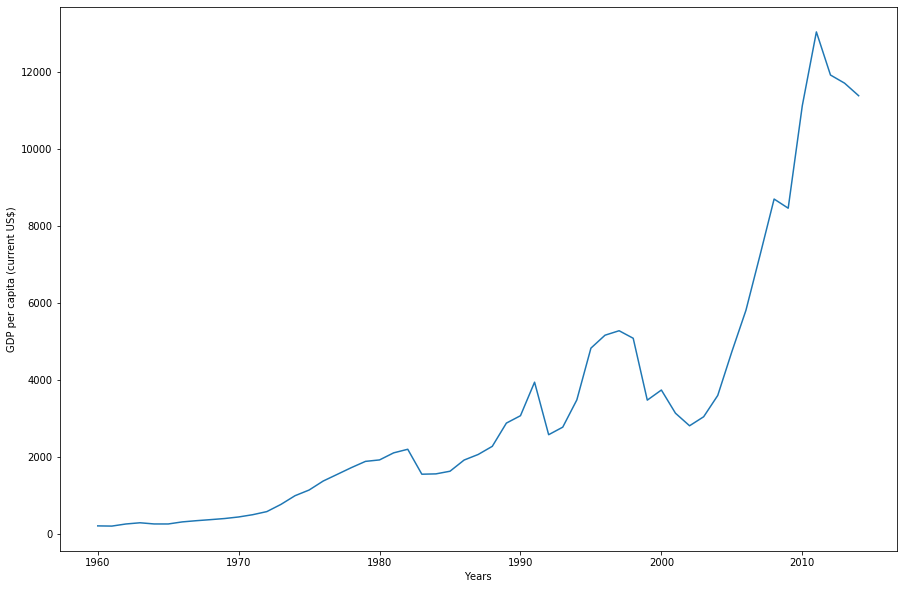

In [11]:
X = df_gdp_br['Year'].values
Y = df_gdp_br['Value'].values


plt.figure(figsize = (15,10))
plt.plot(X,Y)
plt.xlabel('Years')
plt.ylabel(df_gdp_br['IndicatorName'].iloc[0])

plt.show()

## i will try to see a correlation between gdp X 

In [36]:
# Life expectancy at birth, total (years)
gdp_mask = df_comp_br['IndicatorName'] == 'GDP per capita (current US$)'
birth_mask = df_comp_br['IndicatorName'] == 'Life expectancy at birth, total (years)'   



In [13]:
gdp_birth_br

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5682,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,209.198785
5736,Brazil,BRA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,54.205463
29766,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,203.955154
29829,Brazil,BRA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,54.718707
56807,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,258.757669
...,...,...,...,...,...,...
5242722,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
5242938,Brazil,BRA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2012,73.839585
5413889,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
5414087,Brazil,BRA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,74.122439


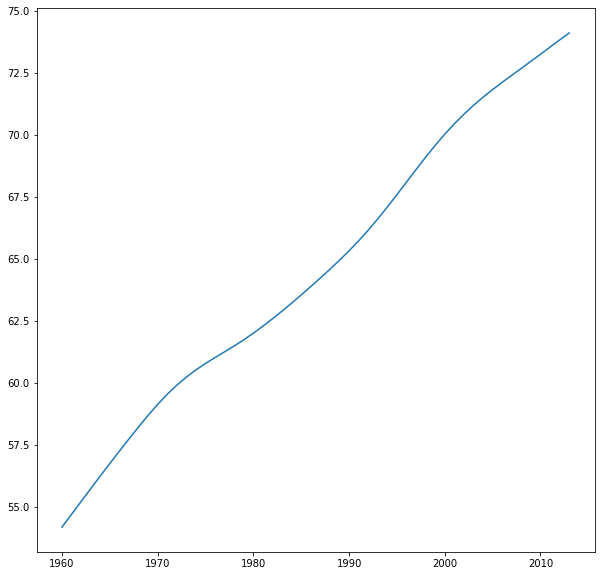

In [14]:
df_birth_br = df_comp_br[birth_mask]
df_birth_br.head()

y1 = df_birth_br['Value'].values
x1 = df_birth_br['Year'].values

plt.figure(figsize = (10,10))
plt.plot(x1, y1)

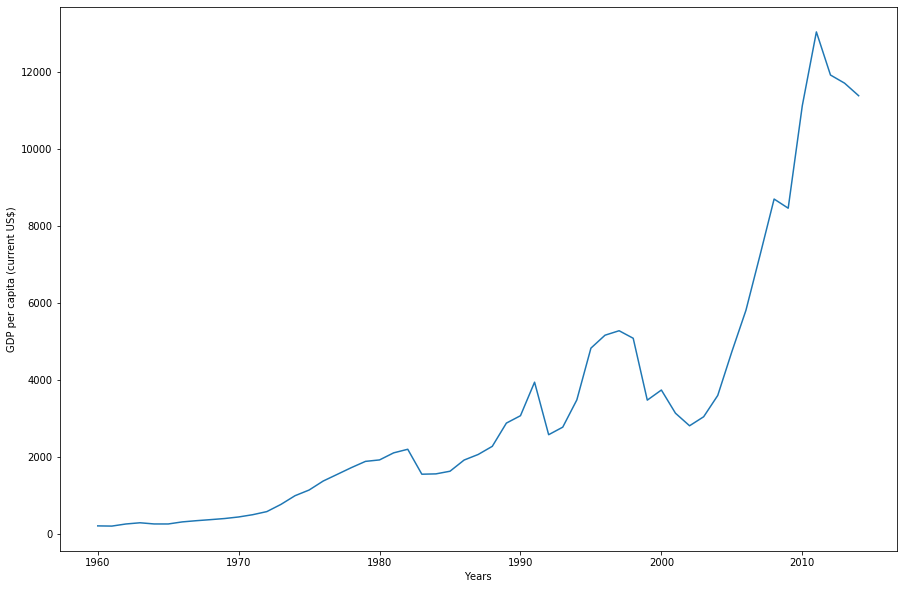

In [15]:
X = df_gdp_br['Year'].values
Y = df_gdp_br['Value'].values


plt.figure(figsize = (15,10))
plt.plot(X,Y)
plt.xlabel('Years')
plt.ylabel(df_gdp_br['IndicatorName'].iloc[0])

plt.show()

In [16]:
import numpy as np

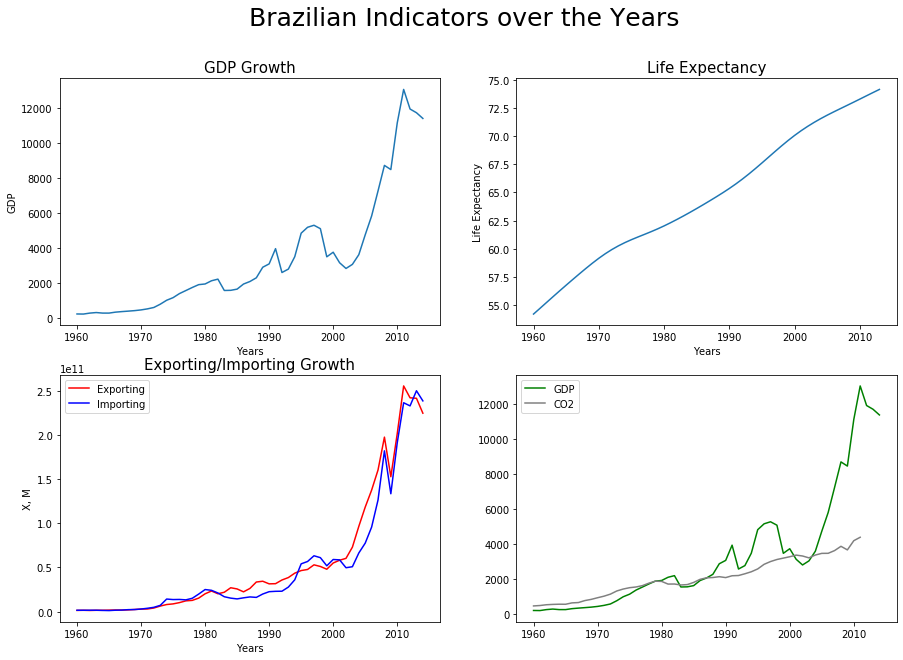

In [58]:

fig1, f1_axes = plt.subplots(ncols = 2, nrows = 2, figsize = (15,10))

f1_axes[0,0].plot(X, Y)
f1_axes[0,1].plot(x1,y1)
f1_axes[1,0].plot(x2,y2, label = 'Exporting', color = 'red')
f1_axes[1,0].plot(x3,y3, label = 'Importing', color = 'blue')
f1_axes[1,1].plot(X, Y, label = 'GDP', color = 'green')
f1_axes[1,1].plot(x4, y4_adjusted, label = 'CO2', color = 'gray')



# colocando um título geral

fig1.suptitle("Brazilian Indicators over the Years", size = 25)

# colocando títulos para os axes
f1_axes[0,0].set_title('GDP Growth', size = 15)
f1_axes[0,1].set_title('Life Expectancy', size = 15)
f1_axes[1,0].set_title('Exporting/Importing Growth', size = 15)

# colocando títulos nos eixos

f1_axes[0,0].set_xlabel('Years')
f1_axes[0,0].set_ylabel('GDP')


f1_axes[0,1].set_xlabel('Years')
f1_axes[0,1].set_ylabel('Life Expectancy')

f1_axes[1, 0].set_xlabel('Years')
f1_axes[1,0].set_ylabel('X, M')

f1_axes[1,0].legend()
f1_axes[1,1].legend()

plt.show()

In [18]:
#Merchandise exports (current US$)'

exp_mask = df_comp_br['IndicatorName'] == 'Merchandise exports (current US$)'

df_exp_br = df_comp_br[exp_mask]

df_exp_br.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5740,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1960,1.268000e+09
29834,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1961,1.403000e+09
56879,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1962,1.214000e+09
85267,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1963,1.406000e+09
113979,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1964,1.430000e+09
143628,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1965,1.596000e+09
175452,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1966,1.741000e+09
207100,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1967,1.654000e+09
239776,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1968,1.881000e+09
272463,Brazil,BRA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1969,2.311000e+09


In [19]:
y2 = df_exp_br['Value'].values
x2 = df_exp_br['Year'].values


In [21]:
#Merchandise imports (current US$)
imp_mask = df_comp_br['IndicatorName'] == 'Merchandise imports (current US$)'
df_imp_br = df_comp_br[imp_mask]
df_imp_br.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5752,Brazil,BRA,Merchandise imports (current US$),TM.VAL.MRCH.CD.WT,1960,1.462000e+09
29846,Brazil,BRA,Merchandise imports (current US$),TM.VAL.MRCH.CD.WT,1961,1.460000e+09
56891,Brazil,BRA,Merchandise imports (current US$),TM.VAL.MRCH.CD.WT,1962,1.475000e+09
85279,Brazil,BRA,Merchandise imports (current US$),TM.VAL.MRCH.CD.WT,1963,1.487000e+09
113991,Brazil,BRA,Merchandise imports (current US$),TM.VAL.MRCH.CD.WT,1964,1.263000e+09


In [22]:
values_exp = df_exp_br['Value']
values_imp = df_imp_br['Value']
# values_exp[:10]

In [23]:
values_exp.reset_index(drop = True, inplace = True)

In [24]:
values_imp.reset_index(drop = True, inplace = True)

In [25]:
df_XM = pd.concat([values_exp, values_imp], axis = 1, ignore_index = True)
df_XM.columns = ['Exporting', 'Importing']
df_XM.head()

,Exporting,Importing
0,1.268000e+09,1.462000e+09
1,1.403000e+09,1.460000e+09
2,1.214000e+09,1.475000e+09
3,1.406000e+09,1.487000e+09
4,1.430000e+09,1.263000e+09


In [37]:
df_XM.corr()

,Exporting,Importing
Exporting,1.000000,0.985894
Importing,0.985894,1.000000


In [38]:
mask = df_comp_br['IndicatorName'] == 'CO2 emissions (kt)'
df_co2_br = df_comp_br[mask]
df_co2_br.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641,Brazil,BRA,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,46908.264
29721,Brazil,BRA,CO2 emissions (kt),EN.ATM.CO2E.KT,1961,49203.806
56758,Brazil,BRA,CO2 emissions (kt),EN.ATM.CO2E.KT,1962,53695.881
85146,Brazil,BRA,CO2 emissions (kt),EN.ATM.CO2E.KT,1963,55617.389
113858,Brazil,BRA,CO2 emissions (kt),EN.ATM.CO2E.KT,1964,56735.824


In [42]:
# I will see GDP x CO2 emission
values_gdp = df_gdp_br['Value']
values_co2 = df_co2_br['Value']

values_gdp.reset_index(drop = True, inplace = True)
values_co2.reset_index(drop = True, inplace = True)

df_GC = pd.concat([values_gdp, values_co2], axis = 1, ignore_index = True)
df_GC.columns = ['GDP', 'CO2 emission']
df_GC.head()

,GDP,CO2 emission
0,209.198785,46908.264
1,203.955154,49203.806
2,258.757669,53695.881
3,290.058284,55617.389
4,259.466969,56735.824


In [44]:
# we see that exporting and importing have high correlation level, let's put both in the same graph to see it
df_GC.corr()

,GDP,CO2 emission
GDP,1.000000,0.878764
CO2 emission,0.878764,1.000000


In [61]:
x4 = df_co2_br['Year'].values
y4 = df_co2_br['Value'].values

In [62]:
Y

array([  209.19878514,   203.95515417,   258.75766854,   290.05828414,
         259.46696881,   259.00415212,   312.88190815,   344.29451204,
         371.39309675,   400.26285887,   440.99310629,   500.03411205,
         580.48849525,   767.30985151,   993.28964125,  1140.9011496 ,
        1374.53575801,  1548.39826686,  1723.13723467,  1885.09105718,
        1923.28261521,  2106.67895662,  2199.7019928 ,  1551.77303604,
        1560.45578862,  1629.26490916,  1919.86480364,  2064.65401141,
        2276.2405561 ,  2879.49987029,  3071.62795314,  3942.4039412 ,
        2578.20700864,  2774.17412694,  3482.52981637,  4827.15244263,
        5163.2658127 ,  5279.11129785,  5083.70096425,  3476.1440382 ,
        3738.71941172,  3136.49673342,  2810.2307896 ,  3044.25502669,
        3597.97883565,  4733.16418107,  5809.18909595,  7240.92398338,
        8700.45520184,  8462.50834559, 11124.24577964, 13042.42193262,
       11922.51305768, 11711.0044045 , 11384.41500951])

In [60]:
y4_adjusted = df_co2_br['Value'].values/100
y4_adjusted

array([ 469.08264,  492.03806,  536.95881,  556.17389,  567.35824,
        563.9846 ,  643.04512,  661.93017,  774.21371,  843.15331,
        937.61523, 1026.35663, 1143.62729, 1324.63041, 1434.56707,
       1511.64741, 1551.54437, 1629.6148 , 1769.25416, 1883.22452,
       1870.9034 , 1718.06284, 1721.76651, 1666.32147, 1688.06678,
       1812.48809, 1988.83412, 2075.30198, 2093.63698, 2140.24455,
       2088.86988, 2193.30604, 2207.05729, 2307.38641, 2421.54012,
       2583.47484, 2847.82887, 3005.4732 , 3122.89054, 3201.73104,
       3279.83814, 3374.33673, 3322.6687 , 3216.21569, 3378.26042,
       3473.08904, 3476.6827 , 3632.12683, 3876.7524 , 3671.47374,
       4197.54156, 4394.12943])

In [99]:
mask = df_comp['CountryName'] == 'China'
df_comp_ch = df_comp[mask]


In [100]:
df_comp_ch.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7144,China,CHN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,68.033200
7145,China,CHN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,77.322072
7146,China,CHN,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.472535
7147,China,CHN,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,70.849537
7148,China,CHN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,23.383665


In [103]:
mask = df_comp_ch['IndicatorName'] == 'GDP per capita (current US$)'
df_gdp_ch = df_comp_ch[mask]
df_gdp_ch.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7190,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,88.722498
31487,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,75.048915
58687,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,70.122082
87072,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1963,73.420392
115798,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1964,84.573397


In [121]:
y_ch = df_gdp_ch['Value'].values
y_ch
x_ch = df_gdp_ch['Year'].values
y_ch

array([  88.72249762,   75.04891521,   70.12208196,   73.42039214,
         84.57339733,   97.47009951,  103.18117321,   95.49669148,
         90.37132883,   98.88988471,  111.82272268,  117.18159308,
        130.11126485,  155.07843885,  157.99938033,  175.8657481 ,
        162.92052345,  182.67857431,  155.18462977,  182.51353234,
        193.27683222,  195.56492863,  201.80802396,  223.73493934,
        248.9158221 ,  292.54793904,  280.09804457,  250.31458713,
        282.05678285,  309.26338522,  316.22443042,  331.474916  ,
        364.75966414,  375.8142938 ,  471.76088122,  607.56858312,
        707.0297713 ,  778.94390573,  825.54795708,  869.65488208,
        954.55229173, 1047.47786287, 1141.75764438, 1280.60285481,
       1498.17379563, 1740.09672638, 2082.1833625 , 2673.29419094,
       3441.22135457, 3800.47454161, 4514.94052013, 5574.18709337,
       6264.64387794, 6991.85386564, 7590.01644054])

In [122]:
Y

array([  209.19878514,   203.95515417,   258.75766854,   290.05828414,
         259.46696881,   259.00415212,   312.88190815,   344.29451204,
         371.39309675,   400.26285887,   440.99310629,   500.03411205,
         580.48849525,   767.30985151,   993.28964125,  1140.9011496 ,
        1374.53575801,  1548.39826686,  1723.13723467,  1885.09105718,
        1923.28261521,  2106.67895662,  2199.7019928 ,  1551.77303604,
        1560.45578862,  1629.26490916,  1919.86480364,  2064.65401141,
        2276.2405561 ,  2879.49987029,  3071.62795314,  3942.4039412 ,
        2578.20700864,  2774.17412694,  3482.52981637,  4827.15244263,
        5163.2658127 ,  5279.11129785,  5083.70096425,  3476.1440382 ,
        3738.71941172,  3136.49673342,  2810.2307896 ,  3044.25502669,
        3597.97883565,  4733.16418107,  5809.18909595,  7240.92398338,
        8700.45520184,  8462.50834559, 11124.24577964, 13042.42193262,
       11922.51305768, 11711.0044045 , 11384.41500951])

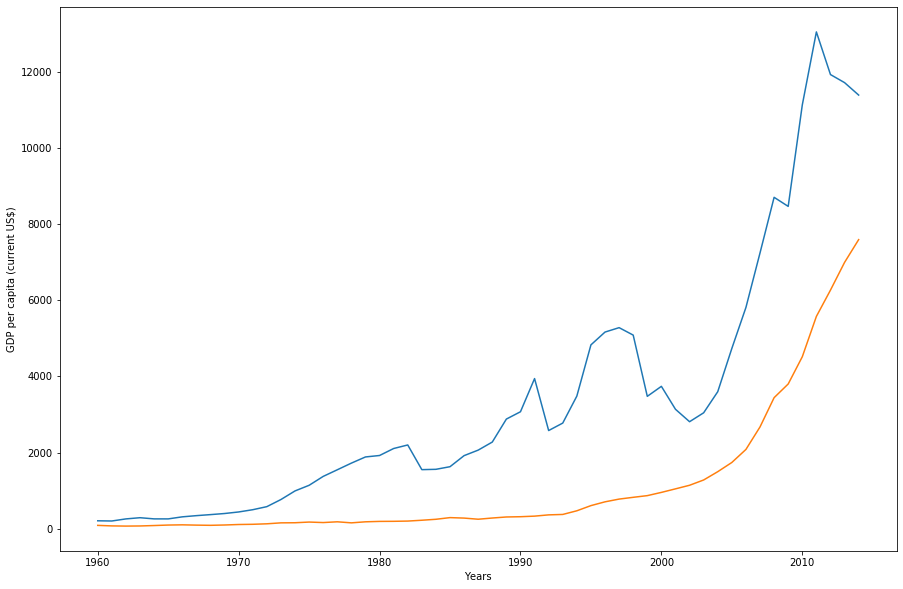

In [118]:
X = df_gdp_br['Year'].values
Y = df_gdp_br['Value'].values


plt.figure(figsize = (15,10))
plt.plot(X,Y)
plt.plot(x_ch, y_ch)

plt.xlabel('Years')
plt.ylabel(df_gdp_br['IndicatorName'].iloc[0])

plt.show()